In [1]:
%config InlineBackend.figure_formats = ['retina']
import numpy as np
import pandas as pd
import seaborn
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
seaborn.set()

In [2]:
df = pd.read_csv('./data/panel_data/Full_DB.csv')

In [3]:
oecd_countries = {'AUS': 'Australia', 'AUT': 'Austria', 'BEL': 'Belgium', 'CAN': 'Canada', 'CHL': 'Chile', 'COL': 'Colombia', 'CZE': 'Czech Republic', 'DNK': 'Denmark', 'EST': 'Estonia', 'FIN': 'Finland', 'FRA': 'France', 'DEU': 'Germany', 'GRC': 'Greece', 'HUN': 'Hungary', 'ISL': 'Iceland', 'IRL': 'Ireland', 'ISR': 'Israel', 'ITA': 'Italy', 'JPN': 'Japan', 'KOR': 'Korea', 'LVA': 'Latvia', 'LTU': 'Lithuania', 'LUX': 'Luxembourg', 'MEX': 'Mexico', 'NLD': 'Netherlands', 'NZL': 'New Zealand', 'NOR': 'Norway', 'POL': 'Poland', 'PRT': 'Portugal', 'SVK': 'Slovakia', 'SVN': 'Slovenia', 'ESP': 'Spain', 'SWE': 'Sweden', 'CHE': 'Switzerland', 'TUR': 'Turkey', 'GBR': 'United Kingdom', 'USA': 'United States'}
code_countries = [code for code in oecd_countries.keys()]
years = [year for year in range(2013,2019)]

# Plot NEET, STR and Exp_LMP through time

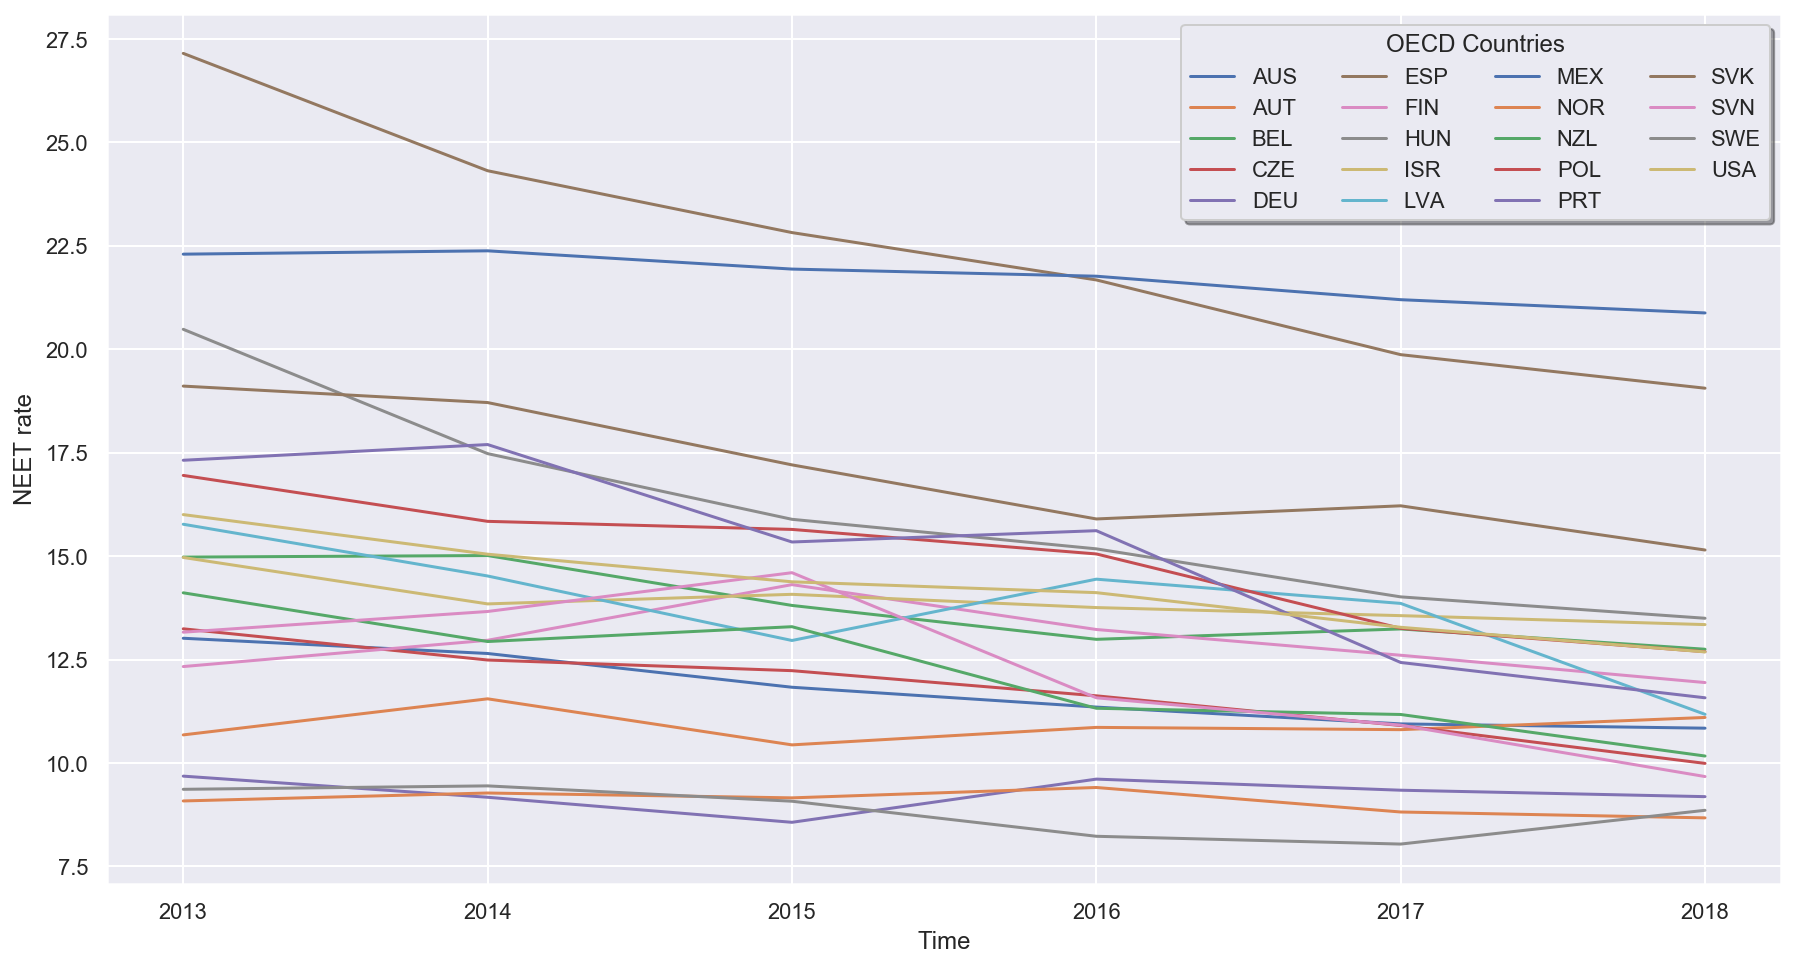

In [4]:
plt.figure(figsize=(15,8))
for code in np.unique(df.Country):
    country_df = df[df.Country==code]
    if len(country_df) != len(years):
        continue
    plt.plot(years, country_df.NEET, label=code)

plt.xlabel('Time', size=12)
plt.ylabel('NEET rate', size=12)
plt.legend(title = "OECD Countries", fancybox=True, shadow=True, ncol=4)
plt.show()

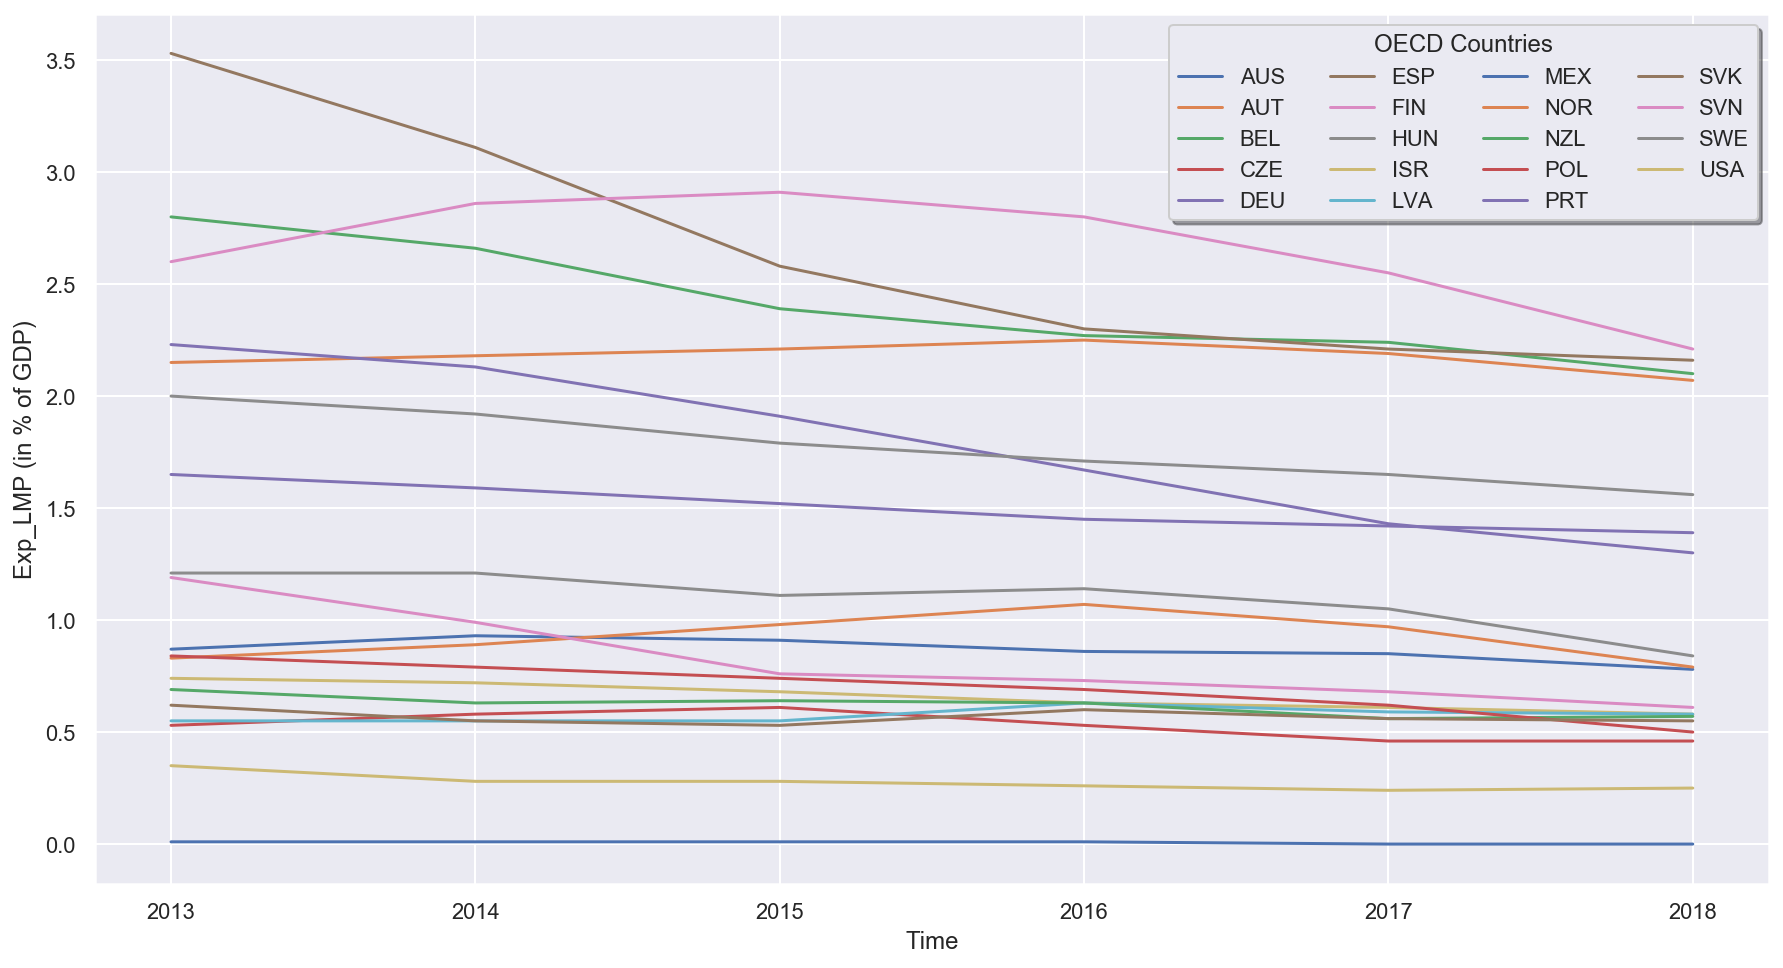

In [5]:
plt.figure(figsize=(15,8))
for code in np.unique(df.Country):
    country_df = df[df.Country==code]
    if len(country_df) != len(years):
        continue
    plt.plot(years, country_df.Exp_LMP, label=code)

plt.xlabel('Time', size=12)
plt.ylabel('Exp_LMP (in % of GDP)', size=12)
plt.legend(title = "OECD Countries", fancybox=True, shadow=True, ncol=4)
plt.show()

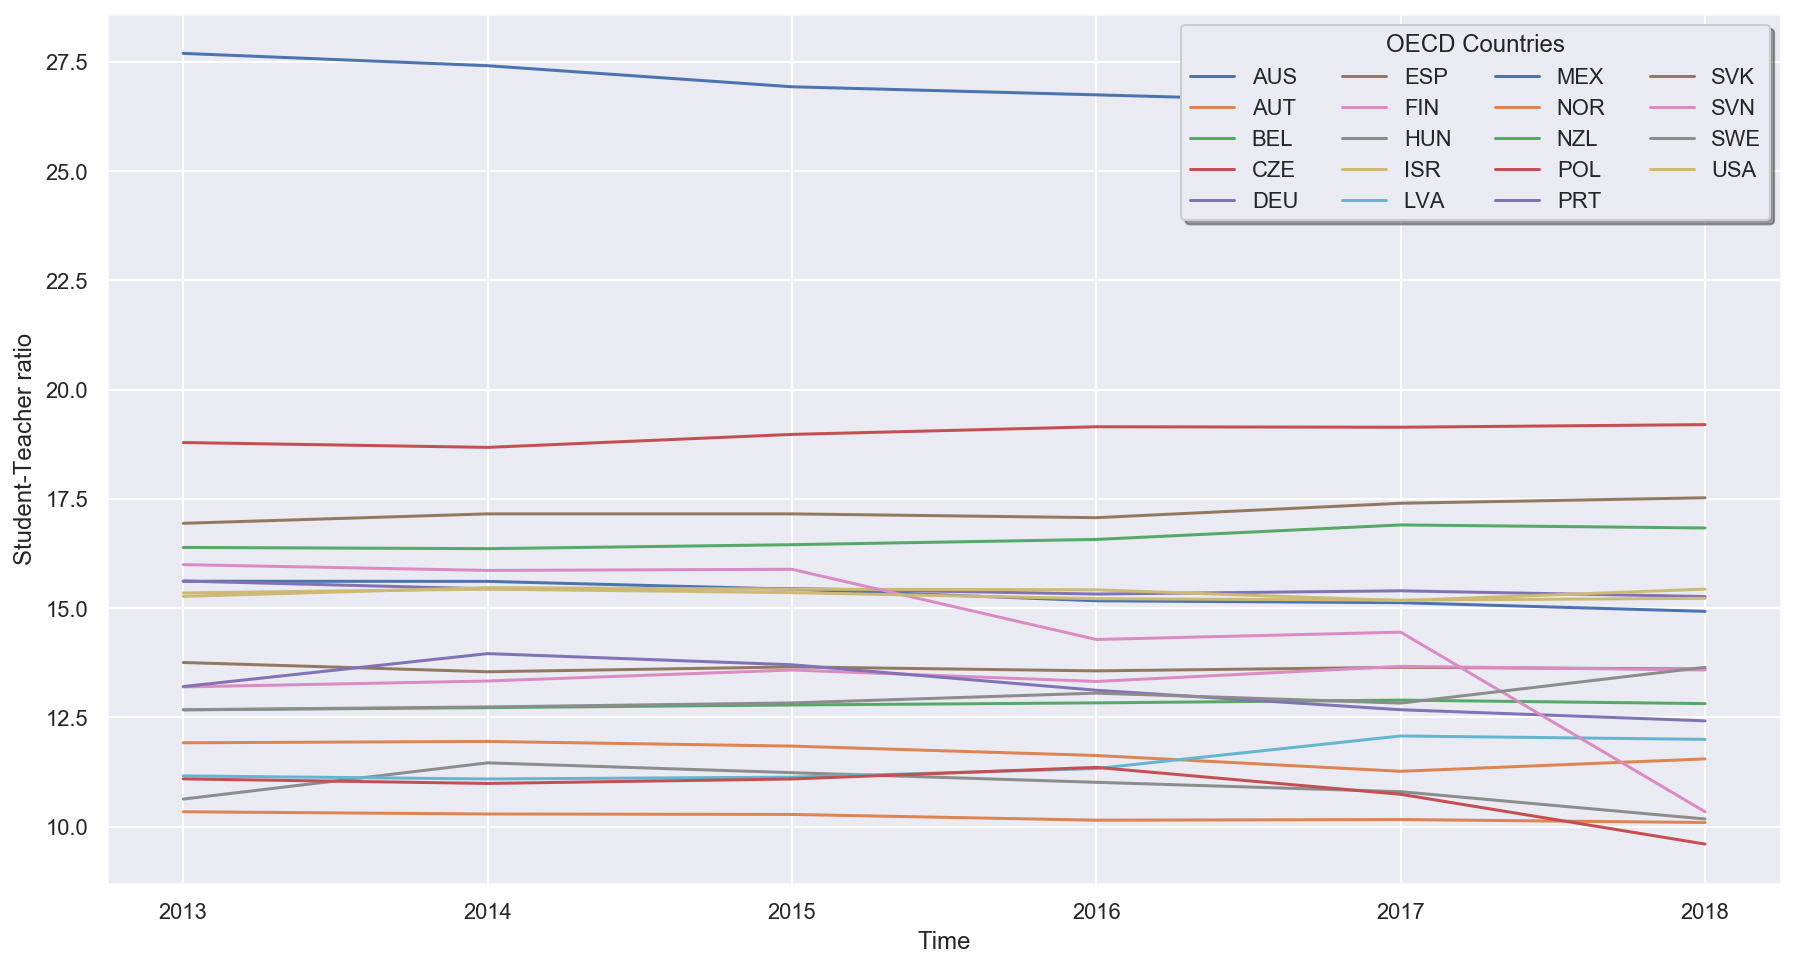

In [6]:
plt.figure(figsize=(15,8))
for code in np.unique(df.Country):
    country_df = df[df.Country==code]
    if len(country_df) != len(years):
        continue
    plt.plot(years, country_df.STR, label=code)

plt.xlabel('Time', size=12)
plt.ylabel('Student-Teacher ratio', size=12)
plt.legend(title = "OECD Countries", fancybox=True, shadow=True, ncol=4)
plt.show()

# Descriptive statistics for dependent and explanatory variables

In [7]:
df.NEET.describe(), df.Exp_LMP.describe(), df.STR.describe()

(count    167.000000
 mean      13.727467
 std        4.220812
 min        6.061046
 25%       10.910744
 50%       13.227513
 75%       15.708727
 max       27.712954
 Name: NEET, dtype: float64,
 count    167.000000
 mean       1.279701
 std        0.870952
 min        0.000000
 25%        0.610000
 50%        0.900000
 75%        1.970000
 max        3.530000
 Name: Exp_LMP, dtype: float64,
 count    167.000000
 mean      14.697407
 std        3.705399
 min        8.819000
 25%       11.973500
 50%       13.959000
 75%       16.553000
 max       27.691000
 Name: STR, dtype: float64)

In [8]:
df_hm = df[['Exp_LMP', 'STR', 'GDP', 'CPI', 'DEBT', 'Years_schooling', 'Exp_educ', 'Strictness_of_workers', 'PT_employ']].dropna()

[Text(0, 0.5, 'Exp_LMP'),
 Text(0, 1.5, 'STR'),
 Text(0, 2.5, 'GDP'),
 Text(0, 3.5, 'CPI'),
 Text(0, 4.5, 'DEBT'),
 Text(0, 5.5, 'Years_school'),
 Text(0, 6.5, 'Exp_educ'),
 Text(0, 7.5, 'W_Protec'),
 Text(0, 8.5, 'PT_employ')]

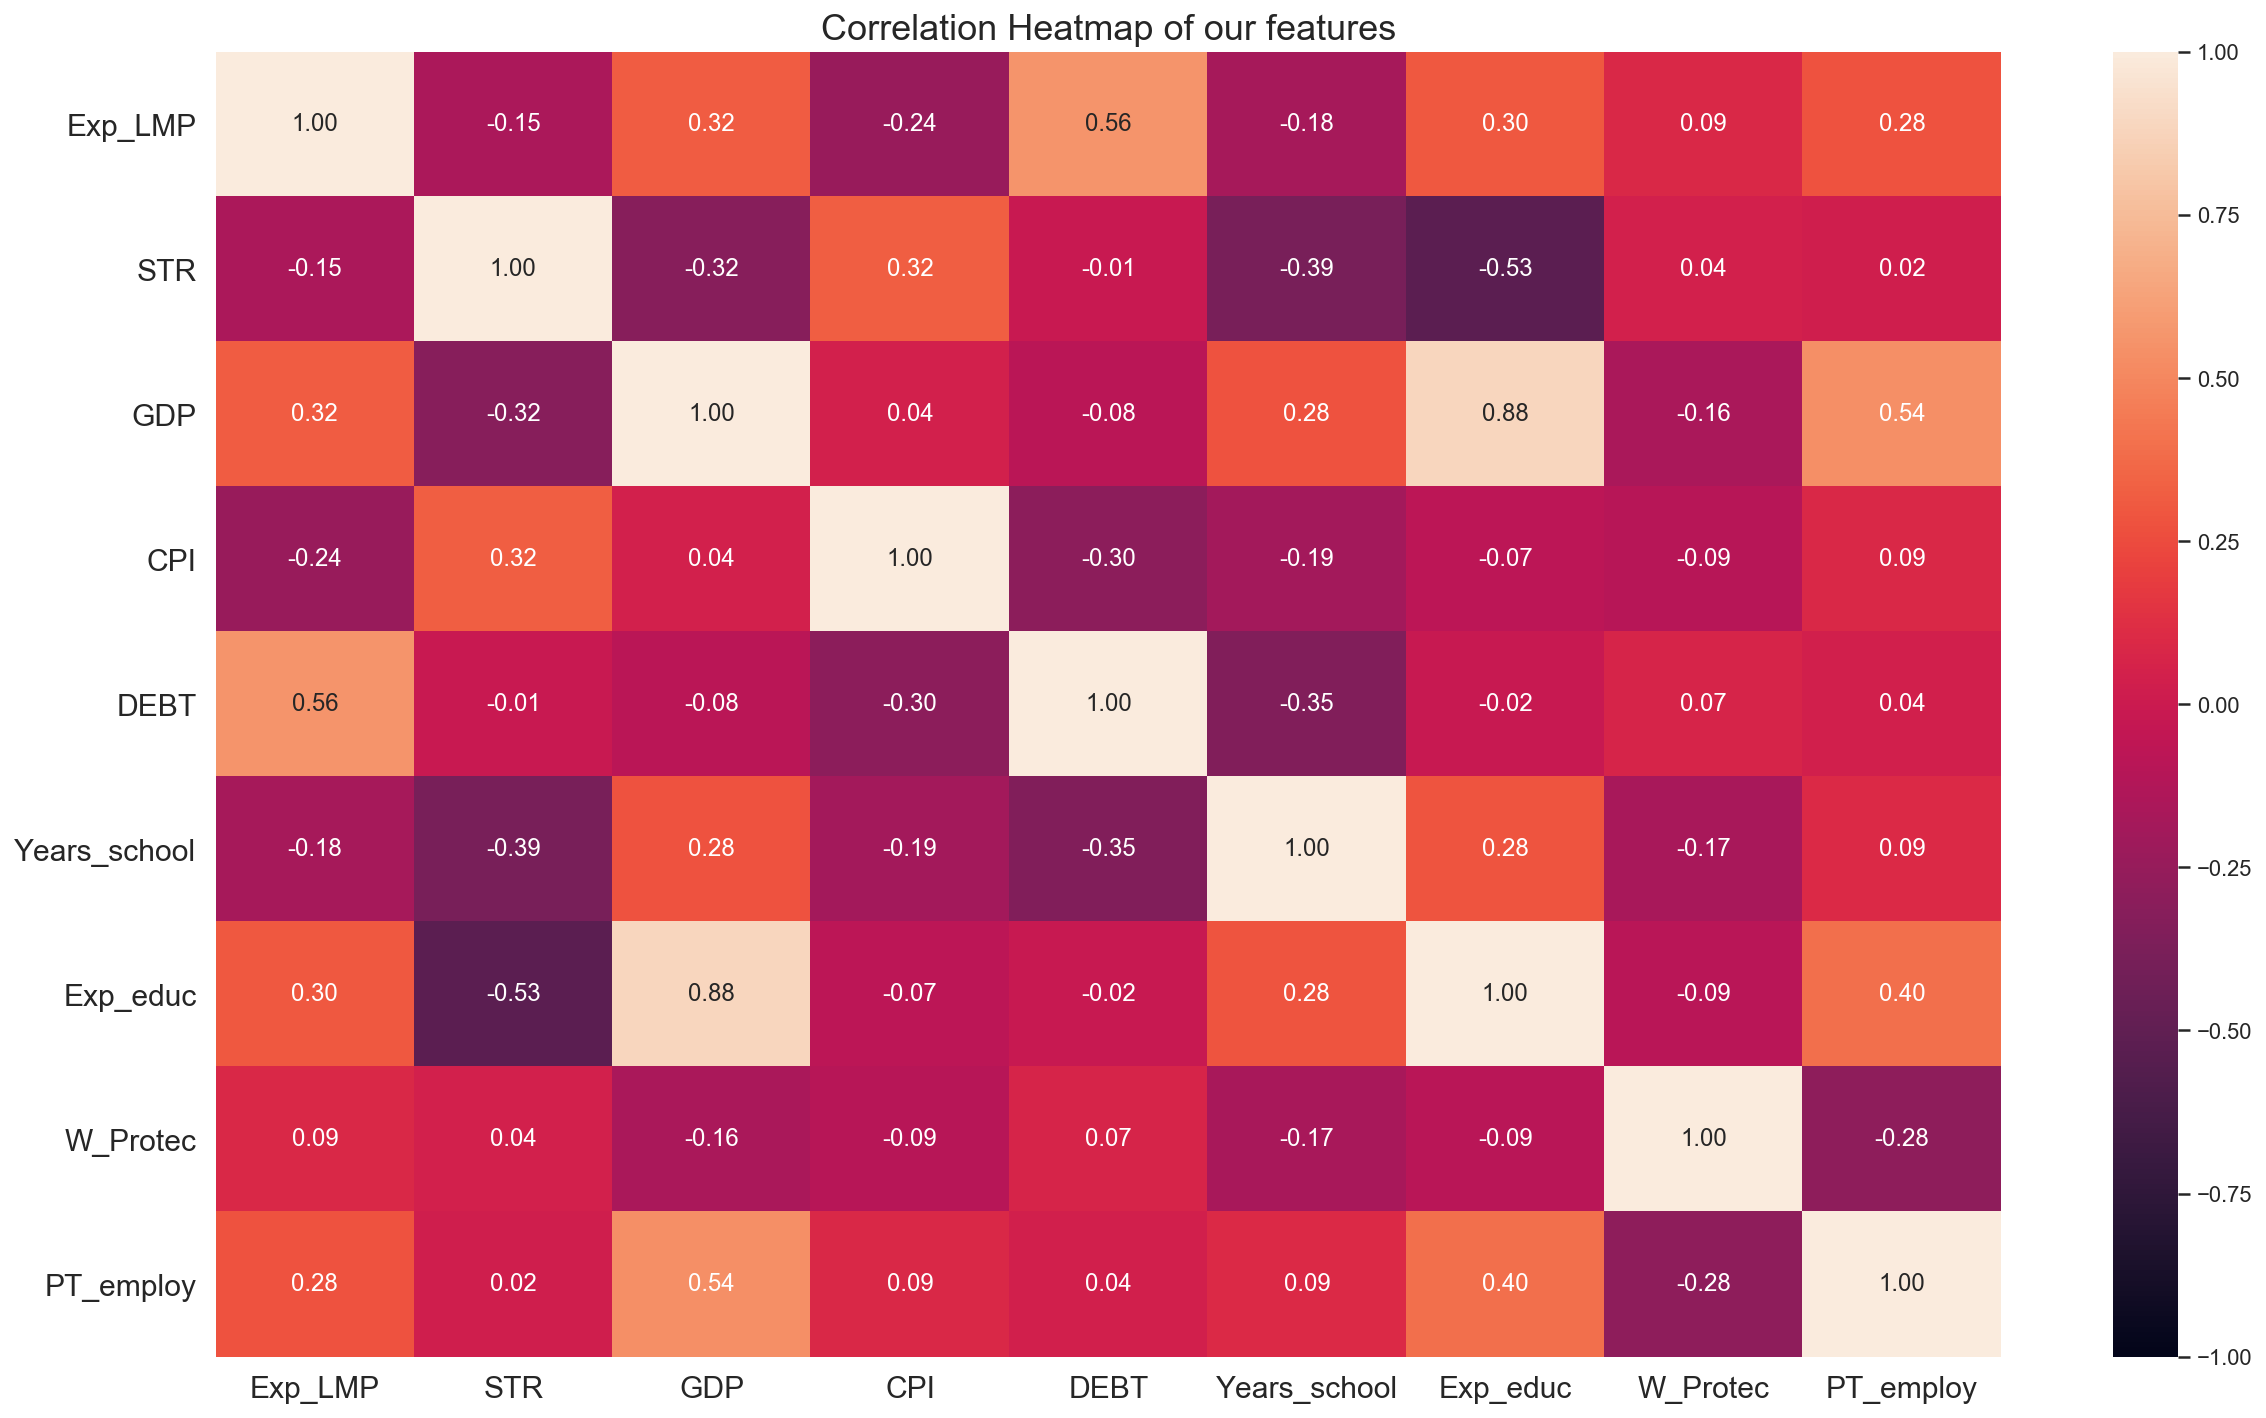

In [9]:
plt.figure(figsize=(20, 12))
heatmap = seaborn.heatmap(df_hm.corr(), vmin=-1, vmax=1, annot=True, fmt=".2f")
heatmap.set_title('Correlation Heatmap of our features', size=18)
labels = ['Exp_LMP', 'STR', 'GDP', 'CPI', 'DEBT', 'Years_school', 'Exp_educ', 'W_Protec', 'PT_employ']
heatmap.set_xticklabels(labels, fontsize = 15, rotation=0)
heatmap.set_yticklabels(labels, fontsize = 15)